In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load = pd.read_csv("data/mouse_drug_data.csv")
mouse_drug_data_to_load.head()
clinical_trial_data_to_load = pd.read_csv("data/clinicaltrial_data.csv")
clinical_trial_data_to_load.head()
# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data_to_load, mouse_drug_data_to_load, on = "Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
combined_df = combined_data.sort_values(by=['Timepoint']).head()
combined_data_df = combined_df.reset_index(drop=True)
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,i635,0,45.0,0,Propriva
2,g791,0,45.0,0,Ramicane
3,w746,0,45.0,0,Propriva
4,r107,0,45.0,0,Propriva


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume  Data Grouped by Drug and Timepoint 
grouped_data = combined_data.groupby(['Drug', 'Timepoint'])
Mean_Tumor_Volume = grouped_data["Tumor Volume (mm3)"].mean()
Mean_Tumor_Volume.head()
# Convert to DataFrame
Tumor_response_data = pd.DataFrame(Mean_Tumor_Volume).reset_index()
# Preview DataFrame
Tumor_response_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Mean_Tumor_Volume_error =  grouped_data["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
Tumor_response_data_error = pd.DataFrame(Mean_Tumor_Volume_error).reset_index()
# Preview DataFrame
Tumor_response_data_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
reformated_data = Tumor_response_data.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
reformated_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


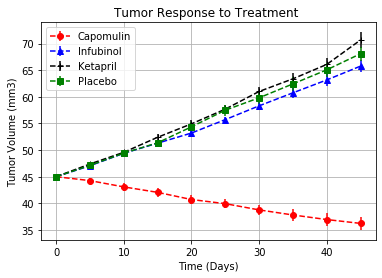

In [7]:
# Generate the Plot (with Error Bars)
# Plot sample means with error bars
Capomulin_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
Infubinol_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
Ketapril_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
Placebo_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Placebo", "Tumor Volume (mm3)"]

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.errorbar(Time, reformated_data["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(Time, reformated_data["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(Time, reformated_data["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "+", color="black", linestyle='--')
plt.errorbar(Time, reformated_data["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "s", color="green", linestyle='--')

plt.legend(loc = "best")
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

#Save the Figure
plt.savefig("../Images/Tumor Response for Treatment.png")
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_data = combined_data.groupby(['Drug', 'Timepoint'])
Mean_meta_data = meta_data["Metastatic Sites"].mean()
Mean_meta_data.head()
# Convert to DataFrame
meta_response_data = pd.DataFrame(Mean_meta_data).reset_index()
# Preview DataFrame
meta_response_data.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_data_error = meta_data["Metastatic Sites"].sem()
meta_response_data_error = pd.DataFrame(meta_data_error).reset_index()
# Preview DataFrame
meta_response_data_error.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
meta_reformated_data = meta_response_data.pivot(index = "Timepoint",  columns = "Drug", values = 'Metastatic Sites')
# Preview that Reformatting worked
meta_reformated_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


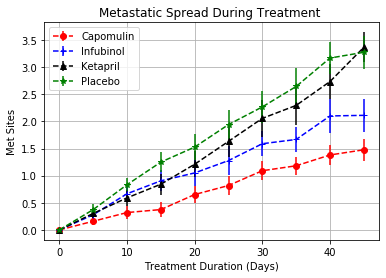

In [14]:
# Generate the Plot (with Error Bars)
Capomulin_error = meta_response_data_error.loc[meta_response_data_error["Drug"] == "Capomulin", "Metastatic Sites"]
Infubinol_error = meta_response_data_error.loc[meta_response_data_error["Drug"] == "Infubinol", "Metastatic Sites"]
Ketapril_error = meta_response_data_error.loc[meta_response_data_error["Drug"] == "Ketapril", "Metastatic Sites"]
Placebo_error = meta_response_data_error.loc[meta_response_data_error["Drug"] == "Placebo", "Metastatic Sites"]


Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.errorbar(Time, meta_reformated_data["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(Time, meta_reformated_data["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "+", color="blue", linestyle='--')
plt.errorbar(Time, meta_reformated_data["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "^", color="black", linestyle='--')
plt.errorbar(Time, meta_reformated_data["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "*", color="green", linestyle='--')


plt.legend(loc = "best")
plt.title("Metastatic Spread During Treatment ")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.grid()
# Save the Figure
plt.savefig("../Images/Metastatic Spread During Treatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_data = combined_data.groupby(['Drug', 'Timepoint'])
survival_data_count = survival_data["Mouse ID"].count()
# Convert to DataFrame
survival_response_data = pd.DataFrame(survival_data_count).reset_index()
# Preview DataFrame
survival_response_data.rename(columns={"Mouse ID": "Mouse Count"})
survival_response_data.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
mouse_count = survival_response_data.rename(columns={"Mouse ID": "Mouse Count"})
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
survival_reformated_data = mouse_count.pivot(index = "Timepoint",  columns = "Drug", values = 'Mouse Count')
# Preview that Reformatting worked
survival_reformated_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


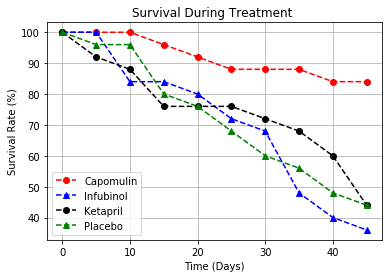

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate the Plot (Accounting for percentages)
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.plot(Time, (survival_reformated_data["Capomulin"]/25)*100, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.plot(Time, (survival_reformated_data["Infubinol"]/25)*100, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.plot(Time,(survival_reformated_data["Ketapril"]/25)*100, label= "Ketapril", marker= "o", color="black", linestyle='--')
plt.plot(Time, (survival_reformated_data["Placebo"]/25)*100, label= "Placebo", marker= "^", color="green", linestyle='--')


plt.legend(loc = "best")
plt.title("Survival During Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
# Show the Figure
plt.show()
# Save the Figure
plt.savefig("../Images/Survival During Treatment.png")

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
capomulin_change = ((reformated_data["Capomulin"][45] - reformated_data["Capomulin"][0])/45)*100
infubinol_change = ((reformated_data["Infubinol"][45] - reformated_data["Infubinol"][0])/45)*100
ketapril_change = ((reformated_data["Ketapril"][45] - reformated_data["Ketapril"][0])/45)*100
placebo_change = ((reformated_data["Placebo"][45] - reformated_data["Placebo"][0])/45)*100

# Display the data to confirm
drug_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                               "Percent Change": [capomulin_change, infubinol_change, ketapril_change, placebo_change]
                              })
drug_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


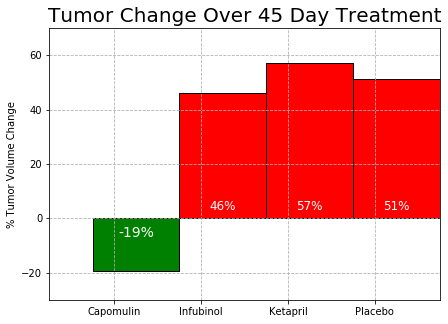

In [23]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple = drug_change_df[['Drug', 'Percent Change']]
tuples = [tuple(x) for x in percent_change_tuple.values]
tuples
# Splice the data between passing and failing drugs
passing_drugs_list = []
failing_drugs_list = []
index_passing_drugs_list = []
index_failing_drugs_list = []
for i,elements in tuples:
    if elements > 0 :
        passing_drug = elements
        passing_drugs_list.append(elements)
        index_passing_drugs_list.append(i)
    else :
        failing_drugs = elements
        failing_drugs_list.append(elements)
        index_failing_drugs_list.append(i)
passing_drugs = list(zip(index_passing_drugs_list, passing_drugs_list))
passing_drugs
failing_drugs = list(zip(index_failing_drugs_list, failing_drugs_list))
failing_drugs
# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(7,5))

capomulin = plt.bar(0, drug_change_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
infubinol = plt.bar(1, drug_change_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
ketapril = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
placebo = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)
x_axis = np.arange(0,4,1)
tick_locations = [value+0.25 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drug_change_df["Drug"])

plt.xlim(-0.5, 4)
plt.ylim(-30, 70, -10)

plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")
# Use functions to label the percentages of changes

def autolabel(drugs):
    for drug in drugs:
        height = drug.get_height()
        plt.text(drug.get_x() + drug.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(capomulin)

def autolabel(drugs):
    for drug in drugs:
        height = drug.get_height()
        plt.text(drug.get_x() + drug.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=12)

autolabel(infubinol)
autolabel(ketapril)
autolabel(placebo)

# Save the Figure
plt.savefig("../Images/Tumor Change over 45 Day Treatment.png")
# Show the Figure
plt.show()